![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [2]:
# Re-run this cell 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [3]:
schools.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')

In [4]:
schools['average_math'].isna().sum()

0

In [25]:
schools['school_name'].isna().sum()

0

In [24]:
schools['average_math'].nunique()

173

In [7]:
schools['school_name'].nunique()

375

In [8]:
best_math_schools = schools[schools['average_math'] >= 640].sort_values(by='average_math', ascending = False)[["school_name","average_math","borough"]]
best_math_schools=best_math_schools.head(10)
print(best_math_schools)

                                           school_name  ...        borough
88                              Stuyvesant High School  ...      Manhattan
170                       Bronx High School of Science  ...          Bronx
93                 Staten Island Technical High School  ...  Staten Island
365  Queens High School for the Sciences at York Co...  ...         Queens
68   High School for Mathematics, Science, and Engi...  ...      Manhattan
280                     Brooklyn Technical High School  ...       Brooklyn
333                        Townsend Harris High School  ...         Queens
174  High School of American Studies at Lehman College  ...          Bronx
0    New Explorations into Science, Technology and ...  ...      Manhattan
45                       Eleanor Roosevelt High School  ...      Manhattan

[10 rows x 3 columns]


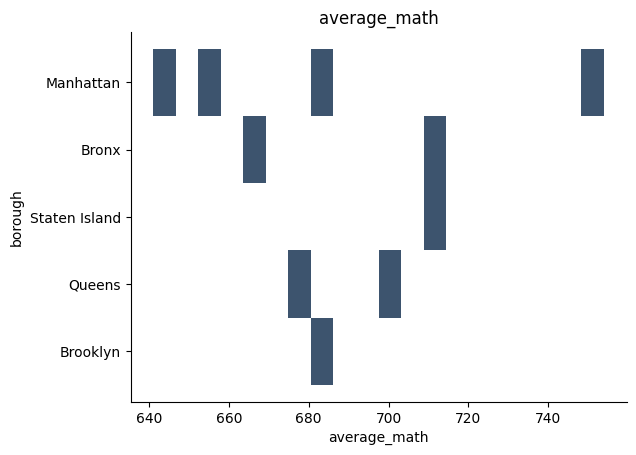

In [14]:
sns.histplot(x='average_math',y='borough',data=best_math_schools, bins=20)
plt.title('average_math')
sns.despine(right=True, top=True)
plt.show()

In [16]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
top_10_schools = schools.nlargest(10, "total_SAT")[["school_name", "total_SAT"]]
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
93,Staten Island Technical High School,2041
170,Bronx High School of Science,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


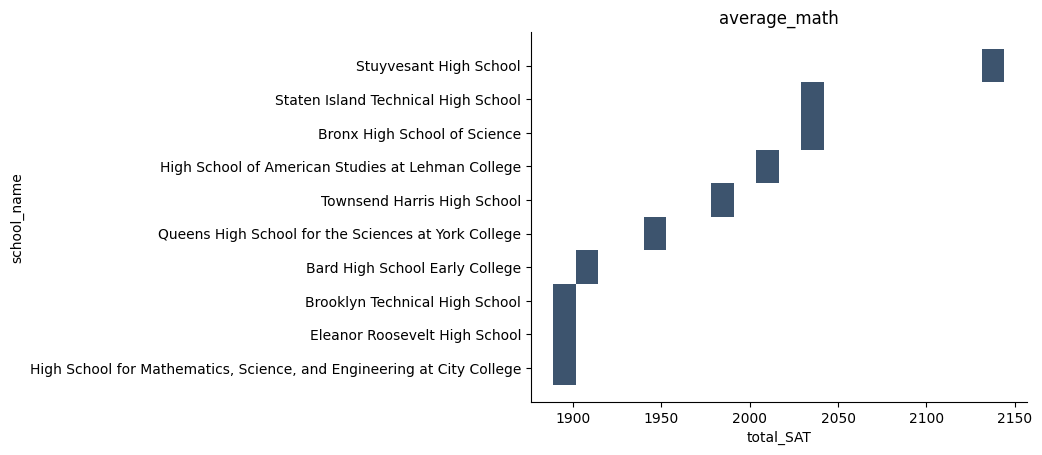

In [18]:
sns.histplot(x='total_SAT',y='school_name',data=top_10_schools, bins=20)
plt.title('average_math')
sns.despine(right=True, top=True)
plt.show()

In [12]:
boroughs= schools.groupby("borough")["total_SAT"].agg(["count","mean","std"]).round(2)

largest_std_dev = boroughs[boroughs["std"]== boroughs["std"].max()]

largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

largest_std_dev 

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
